# CHW1 Convex Optimization
Name: Radmehr Karimian

Student number: 98103556

# Problem 1


In [6]:
import numpy as np
n = 6
A = np.random.rand(n, n)
print("A=")
print(A)

def eigen_qr_simple(A, iterations=500000):
    Ak = np.copy(A)
    n = A.shape[0]
    QQ = np.eye(n)
    for k in range(iterations):
        Q, R = np.linalg.qr(Ak)
        Ak = R @ Q
        QQ = QQ @ Q
        if k == 500000 - 1:
            print("A",k,"=")
            print(Ak)
            print("\n")
    return Ak, QQ
eigen_qr_simple(A)
print(np.linalg.eigvals(A))

A=
[[0.17441649 0.2906615  0.63541684 0.57986448 0.98811703]
 [0.97321772 0.5989492  0.44108721 0.38550195 0.81797715]
 [0.67624816 0.02152063 0.47287927 0.57544544 0.5958072 ]
 [0.63345468 0.10079157 0.93181957 0.86272497 0.19376097]
 [0.62488801 0.0152354  0.36745726 0.34529282 0.55679703]]
A 499999 =
[[ 2.44809259 -0.23904408 -0.9803083   0.52739241  0.19147852]
 [ 0.         -0.60882084  0.1160473  -0.0547049  -0.10522315]
 [ 0.          0.          0.55488401  0.27920105  0.25630219]
 [ 0.          0.          0.          0.37965261  0.44925182]
 [ 0.          0.          0.          0.         -0.10804141]]


[ 2.44809259 -0.60882084  0.55488401  0.37965261 -0.10804141]


In [7]:
import numpy as np
n = 6
A = np.random.rand(n, n)
print("A=")
print(A)

def eigen_qr_simple(A, iterations=500000):
    Ak = np.copy(A)
    n = A.shape[0]
    QQ = np.eye(n)
    for k in range(iterations):
        s = Ak.item(n-1, n-1)
        smult = s * np.eye(n)
        Q, R = np.linalg.qr(np.subtract(Ak, smult))
        Ak = np.add(R @ Q, smult)
        QQ = QQ @ Q
        if k == 500000 - 1:
            print("A",k,"=")
            print(Ak)
            print("\n")
    return Ak, QQ
eigen_qr_simple(A)
print(np.linalg.eigvals(A))

A=
[[0.90175435 0.21966899 0.86809768 0.36574951 0.51191876 0.12609089]
 [0.76408776 0.1299471  0.98287013 0.8948137  0.24633017 0.24465791]
 [0.4534793  0.879327   0.42791639 0.9106051  0.22632509 0.5067423 ]
 [0.09993578 0.52240559 0.16939691 0.71973359 0.75606134 0.39027514]
 [0.54479695 0.73959929 0.0195077  0.36176361 0.88796242 0.76383418]
 [0.61872573 0.02146675 0.47428966 0.60493453 0.66983572 0.98211906]]
A 499999 =
[[ 3.1437225  -0.14707262  0.55833761  0.13838849  0.18528146  0.05514173]
 [ 0.         -0.54098253 -0.47869799 -0.15745731  0.40162826 -0.50351256]
 [ 0.          0.         -0.18777137 -0.52530561  0.07292315 -0.4541111 ]
 [ 0.          0.          0.          0.29664347  0.16439239 -0.35406934]
 [ 0.          0.          0.          0.          0.545024   -0.20471081]
 [ 0.          0.          0.          0.          0.37003116  0.79279685]]


[ 3.1437225 +0.j         -0.54098253+0.j         -0.18777137+0.j
  0.66891042+0.24576723j  0.66891042-0.24576723j  0.2

# Problem 2

u.shape:(1800, 1800),s.shape:(1800,),v.shape:(1800, 2880)
variance Explained by Top 20 singular values:
[8.61299e-01 4.04690e-02 2.87950e-02 2.23330e-02 1.24410e-02 7.12500e-03
 5.64200e-03 3.14700e-03 2.63600e-03 1.63900e-03 1.48600e-03 1.02600e-03
 8.76000e-04 7.83000e-04 6.07000e-04 5.22000e-04 4.17000e-04 4.01000e-04
 3.59000e-04 3.25000e-04]


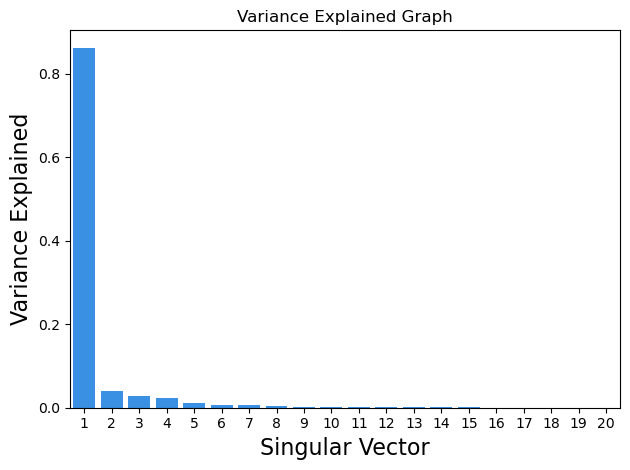

In [10]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# assign and open image
img = cv2.imread('/Users/apple/Downloads/q2_pic.jpg')
  
# Converting the image into gray scale for faster
# computation.
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Calculating the SVD
u, s, v = np.linalg.svd(gray_image, full_matrices=False)
  
# inspect shapes of the matrices
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')

var_explained = np.round(s**2/np.sum(s**2), decimals=6)

# Variance explained top Singular vectors
print(f'variance Explained by Top 20 singular values:\n{var_explained[0:20]}')

sns.barplot(x=list(range(1, 21)),
			y=var_explained[0:20], color="dodgerblue")

plt.title('Variance Explained Graph')
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.show()


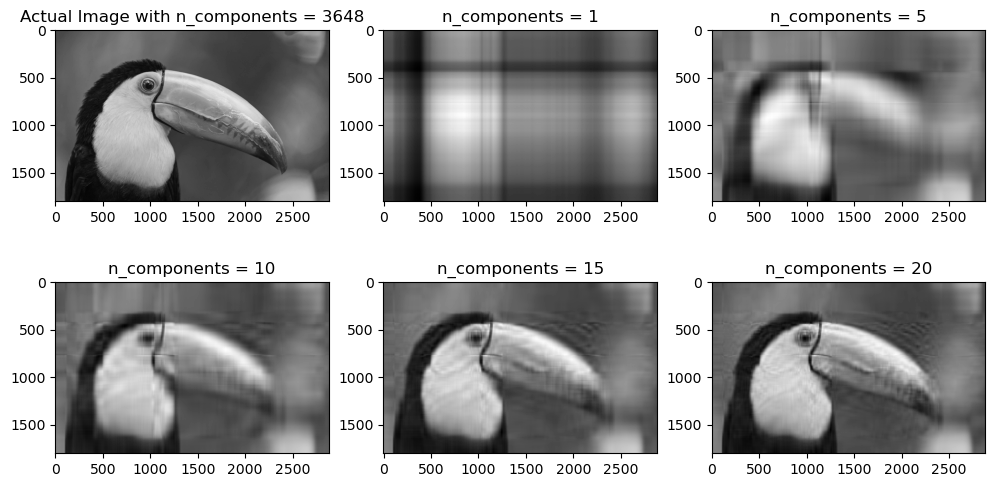

In [11]:
# plot images with different number of components
comps = [3648, 1, 5, 10, 15, 20]
plt.figure(figsize=(12, 6))

for i in range(len(comps)):
	low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]
	
	if(i == 0):
		plt.subplot(2, 3, i+1),
		plt.imshow(low_rank, cmap='gray'),
		plt.title(f'Actual Image with n_components = {comps[i]}')
	
	else:
		plt.subplot(2, 3, i+1),
		plt.imshow(low_rank, cmap='gray'),
		plt.title(f'n_components = {comps[i]}')


In [12]:
from math import log10, sqrt
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [59]:
# plot images with different number of components
comps = range(1,1750,10)
psnr = []
for i in range(len(comps)):
	low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]
	psnr.append(PSNR(gray_image,low_rank))
	# print(psnr[i])

Text(0.5, 1.0, 'PSNR plot')

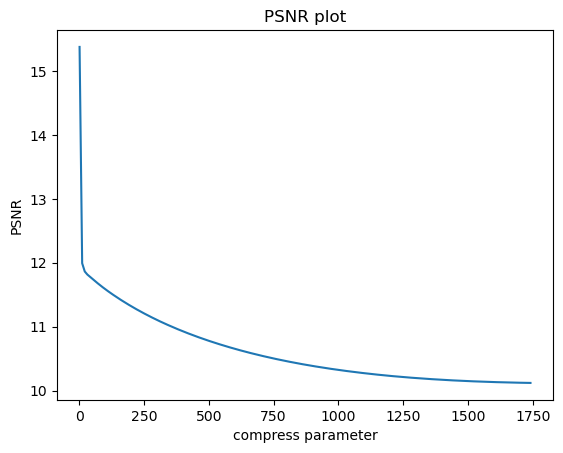

In [60]:
plt.plot(comps,psnr)
plt.xlabel('compress parameter')
plt.ylabel('PSNR')
plt.title('PSNR plot')

In [48]:
def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

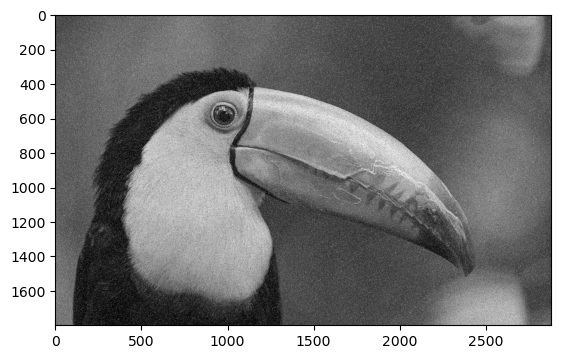

In [56]:
gray_image_noisy = sp_noise(gray_image,0.05)
plt.imshow(gray_image_noisy,cmap='gray')

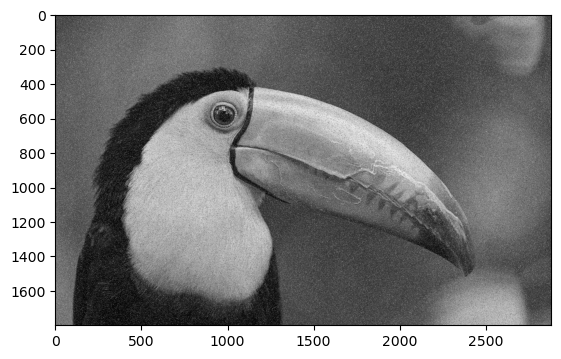

In [57]:
u, s, vh = np.linalg.svd(gray_image_noisy, full_matrices=False)
s_cleaned = np.array([si if si > 250 else 0 for si in s])
img_denoised = np.array(np.dot(u * s_cleaned, vh), dtype=int)
plt.imshow(img_denoised,cmap='gray')

<Axes: >

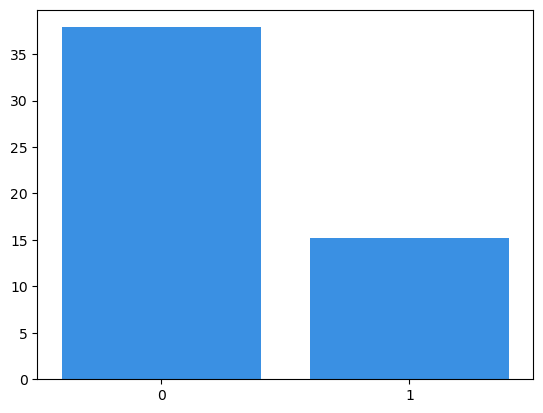

In [58]:
psnr = [PSNR(gray_image,gray_image_noisy),PSNR(gray_image,img_denoised)]
sns.barplot(x=list(range(0, 2)),
			y=psnr, color="dodgerblue")

In [66]:
def g_noisy(image):
      row,col= image.shape
      mean = 0.5
      var = 100
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col))
      gauss = gauss.reshape(row,col)
      noisy = image + gauss
      return noisy

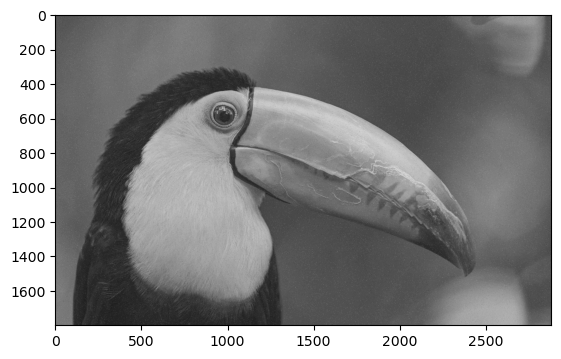

In [67]:
gray_image_noisy = g_noisy(gray_image)
plt.imshow(gray_image_noisy,cmap='gray')

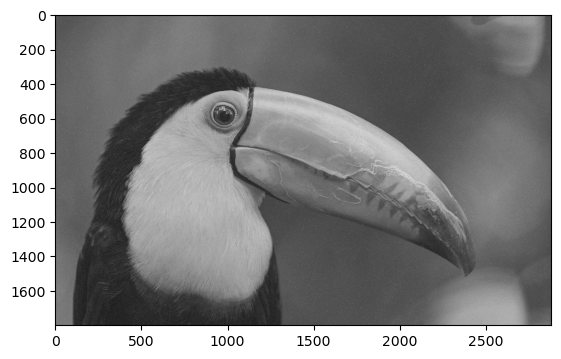

In [68]:
u, s, vh = np.linalg.svd(gray_image_noisy, full_matrices=False)
s_cleaned = np.array([si if si > 250 else 0 for si in s])
img_denoised = np.array(np.dot(u * s_cleaned, vh), dtype=int)
plt.imshow(img_denoised,cmap='gray')

<Axes: >

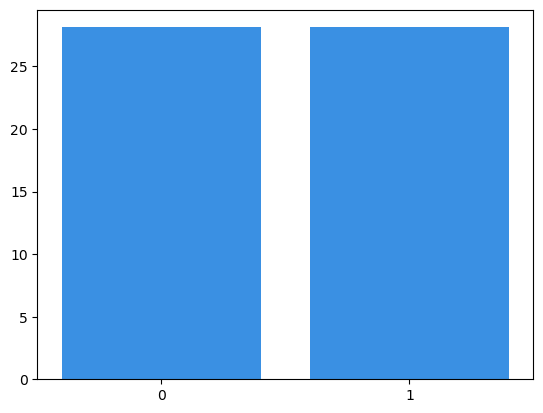

In [69]:
psnr = [PSNR(gray_image,gray_image_noisy),PSNR(gray_image,img_denoised)]
sns.barplot(x=list(range(0, 2)),
			y=psnr, color="dodgerblue")

As you can see its' better on S&P noise

# problem 3

In [71]:
import pandas as pd
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [74]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [75]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
# nothing really special just want to make mean to zero and variance to 1

In [76]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [77]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9303537755893183
0.9274036215173426
0.14834222648163972
0.020746013995595967


In [80]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))
Y = X_std.dot(matrix_w)

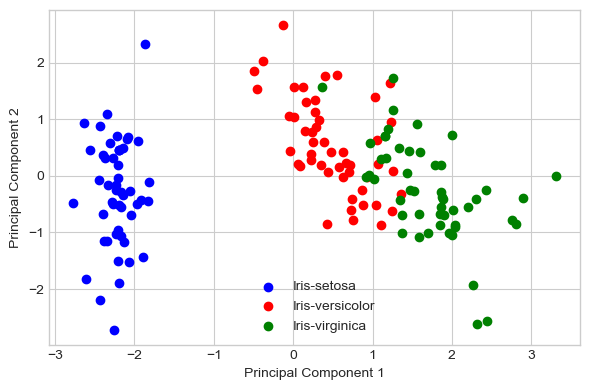

In [81]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()